#Importing Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score

#Uploading dataset

In [78]:
train_data = pd.read_csv('/content/train_LZdllcl.csv')
test_data = pd.read_csv('/content/test_2umaH9m.csv')

In [79]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [80]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


#Step no:1 EDA (Exploratory Data Analysis)

In [81]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [83]:
test_data.shape

(23490, 13)

In [84]:
#Checking for percentage null values in the columns
test_data.isnull().sum()/len(test_data)*100

,0
employee_id,0.000000
department,0.000000
region,0.000000
education,4.401873
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.713921
length_of_service,0.000000


In [85]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [87]:
train_data.shape

(54808, 14)

In [88]:
#Checking for percentage null values in the columns
train_data.isnull().sum()/len(train_data)*100

,0
employee_id,0.000000
department,0.000000
region,0.000000
education,4.395344
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.524449
length_of_service,0.000000


<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


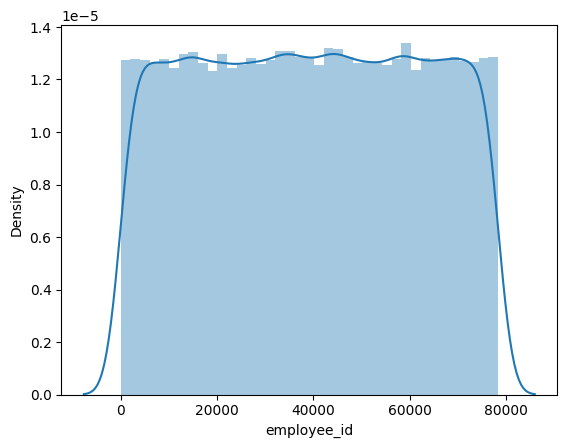

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


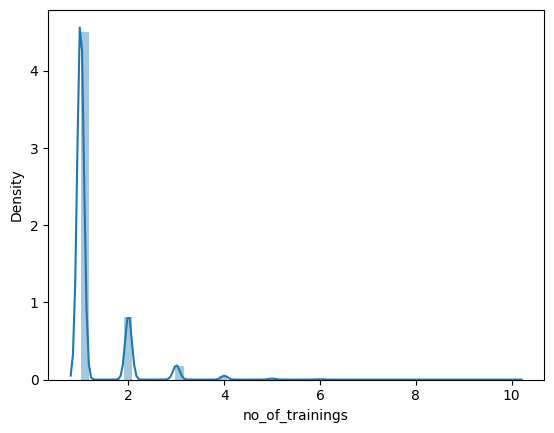

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


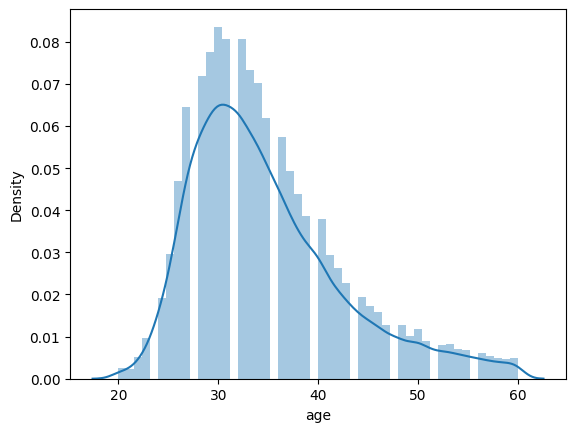

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


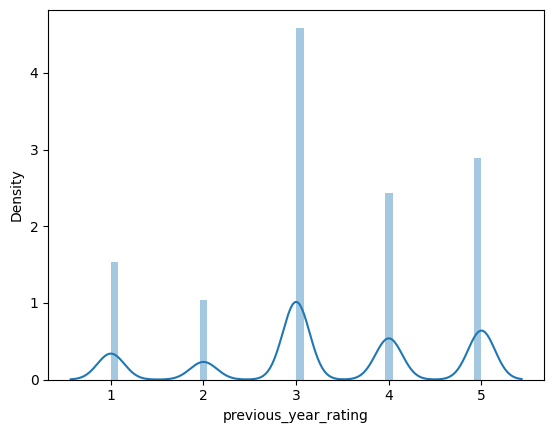

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


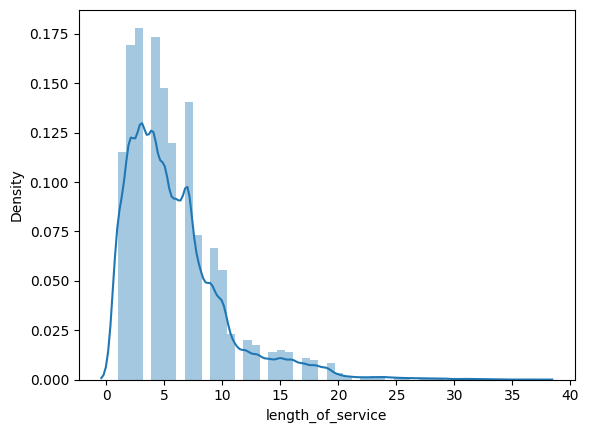

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


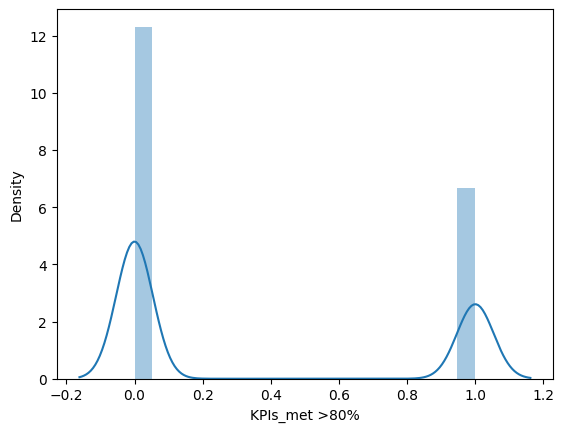

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


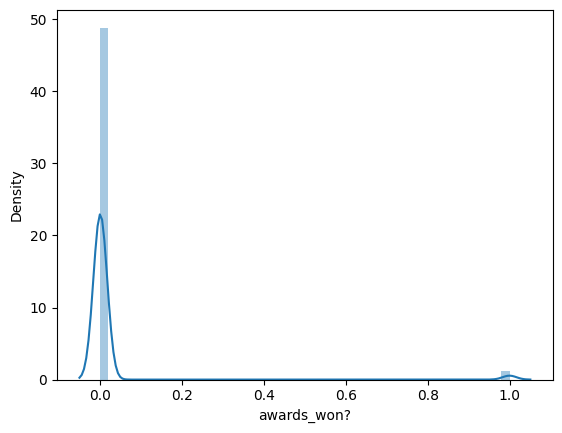

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


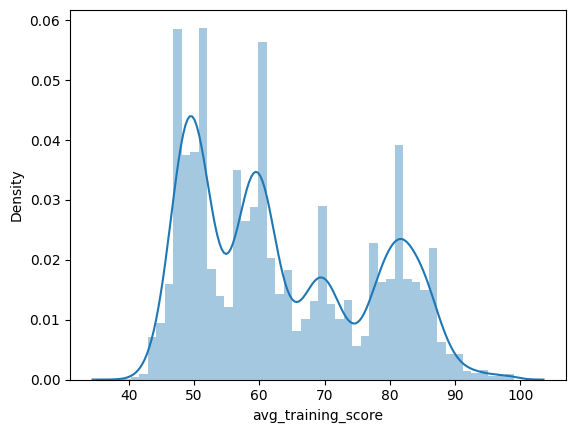

<ipython-input-89-ca0052a4f071>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[col])


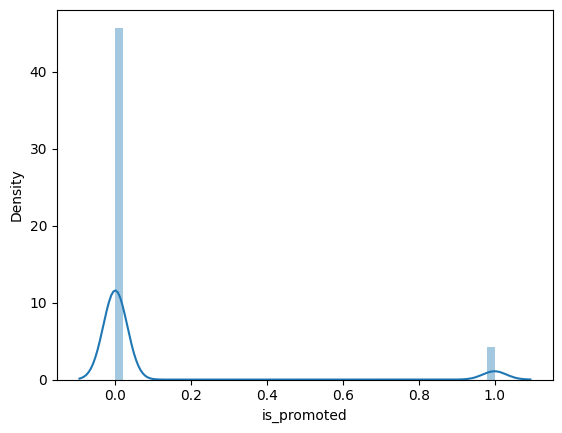

In [89]:
for col in train_data.select_dtypes("number"):
  sns.distplot(train_data[col])
  plt.show()

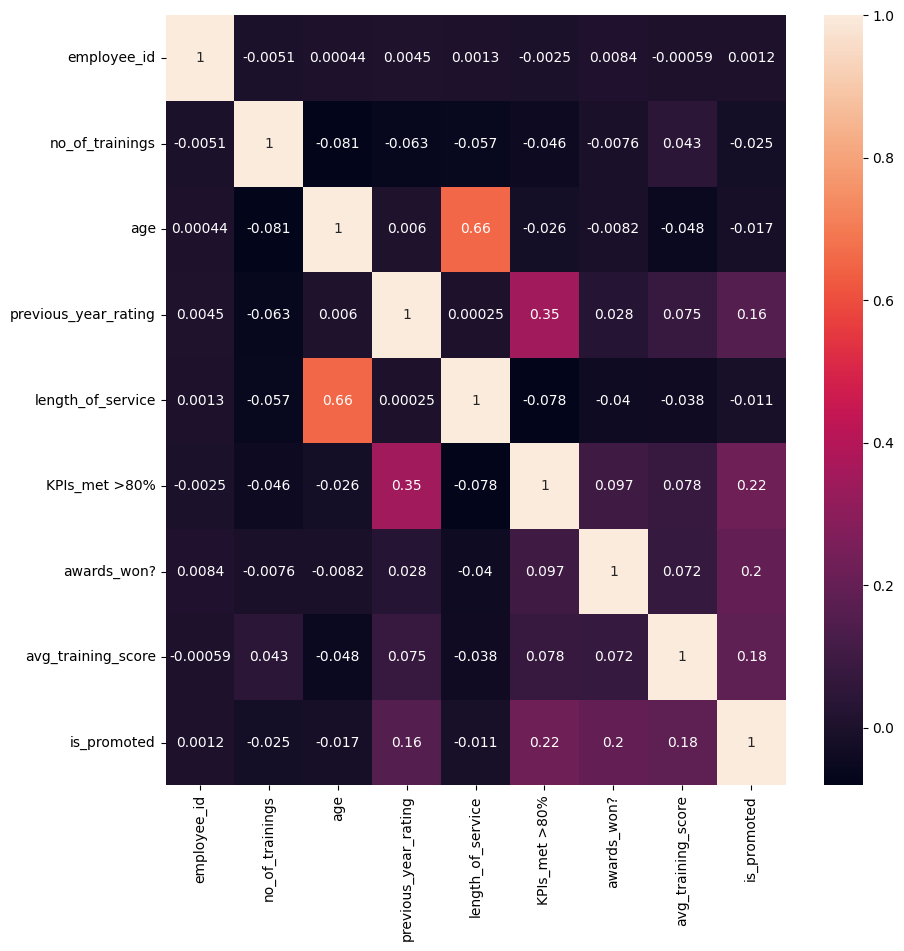

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.select_dtypes('number').corr(),annot=True)
plt.show()

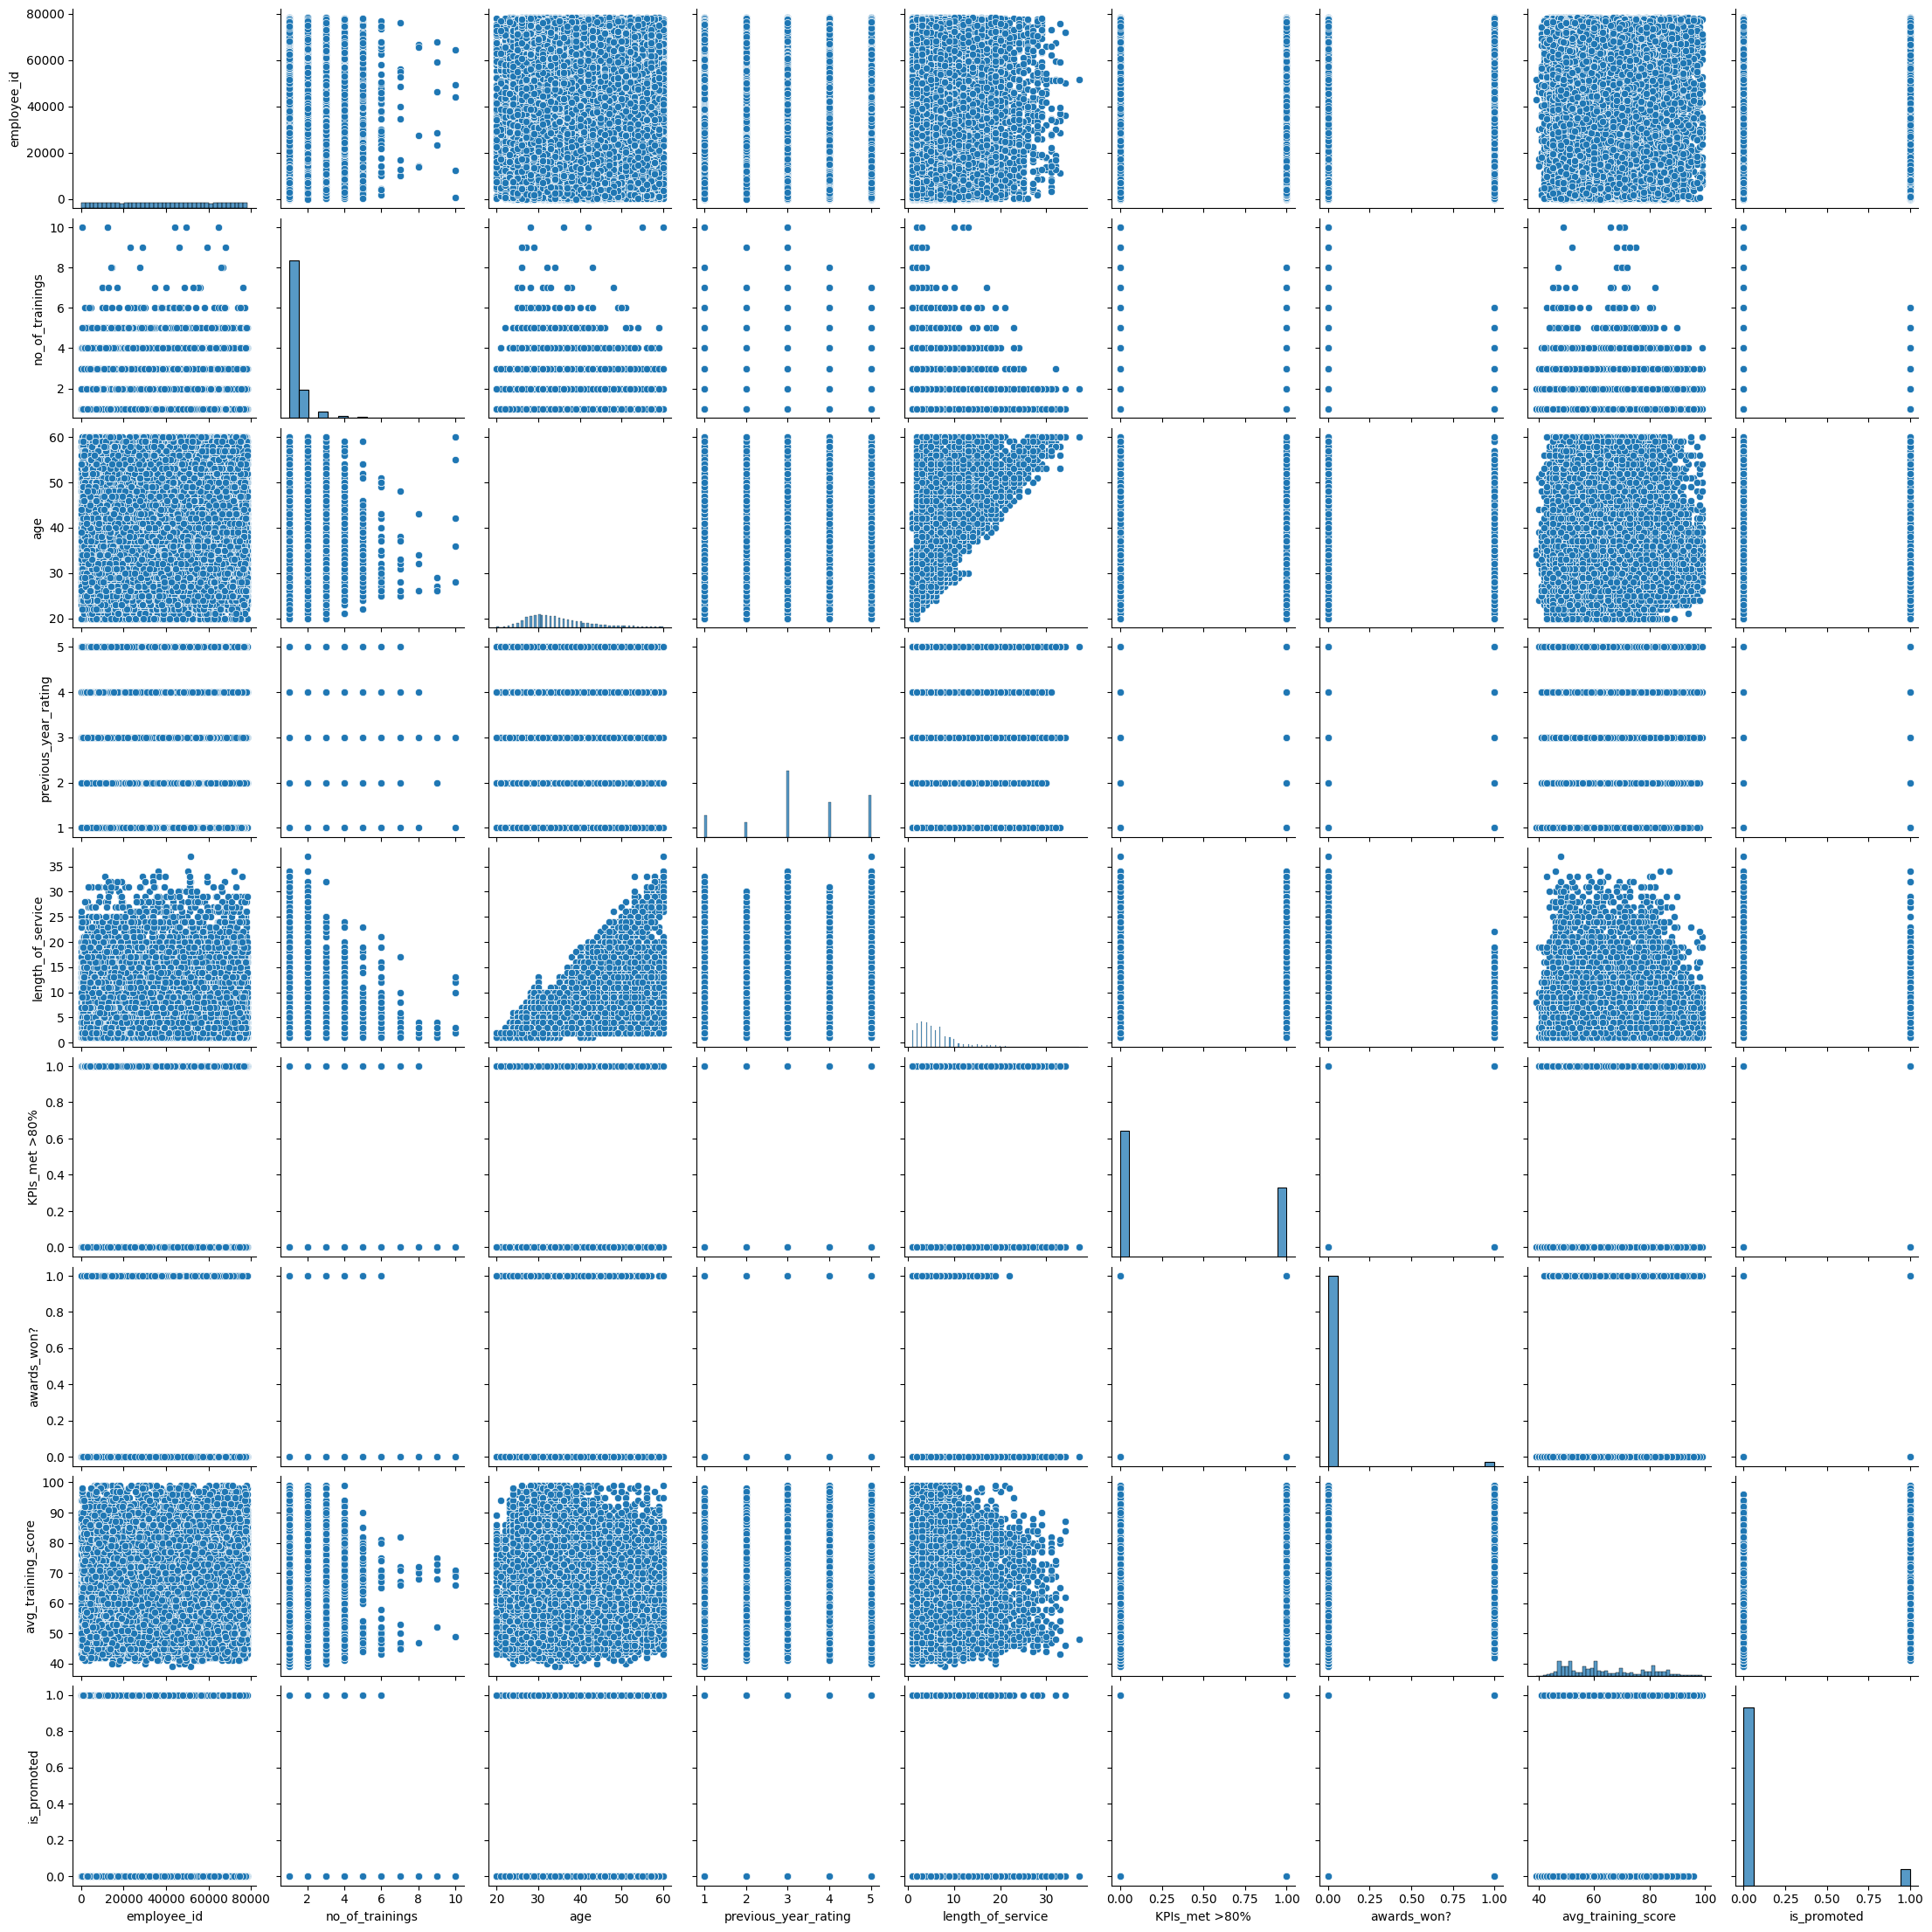

In [91]:
sns.pairplot(train_data)
plt.show()

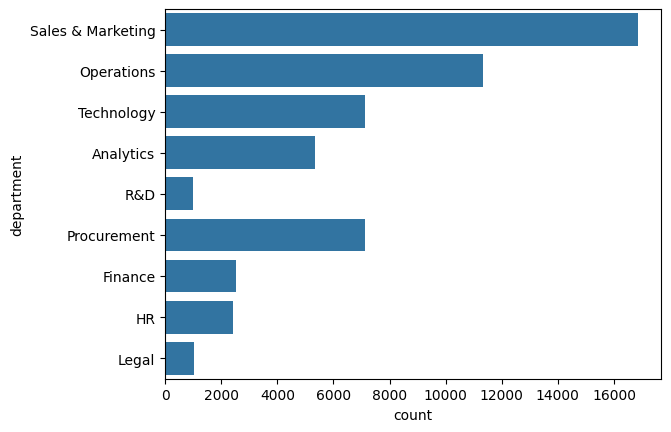

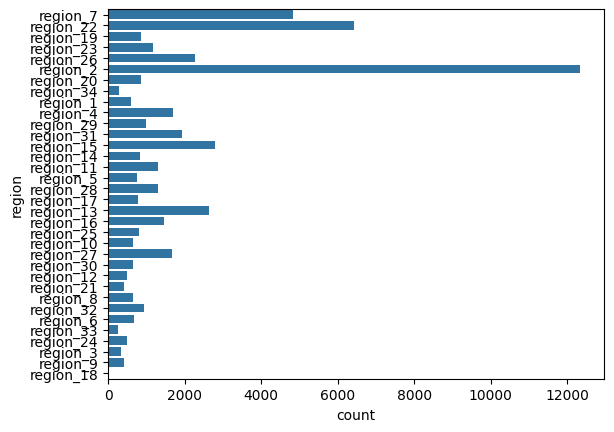

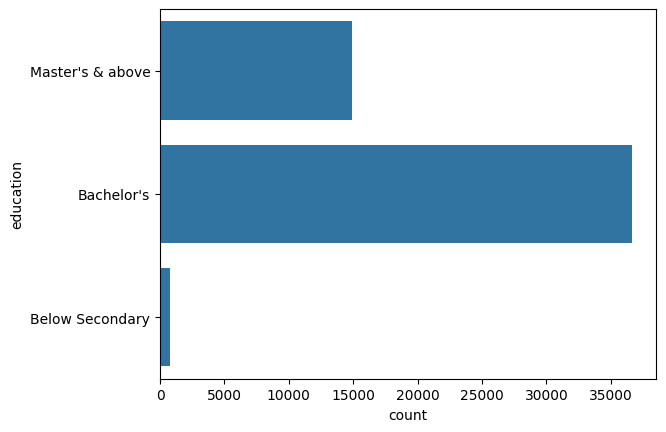

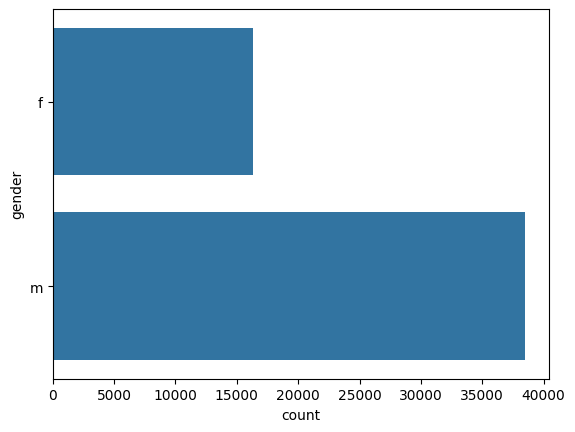

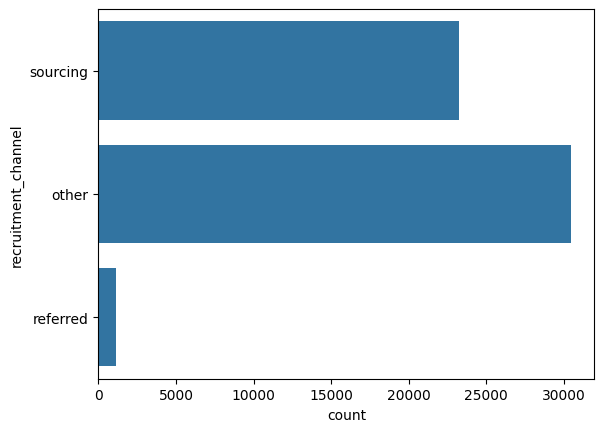

In [92]:
for col in train_data.select_dtypes('object'):
  sns.countplot(train_data[col])
  plt.show()

#Step no:2 Preprocessing

##Outlier detection

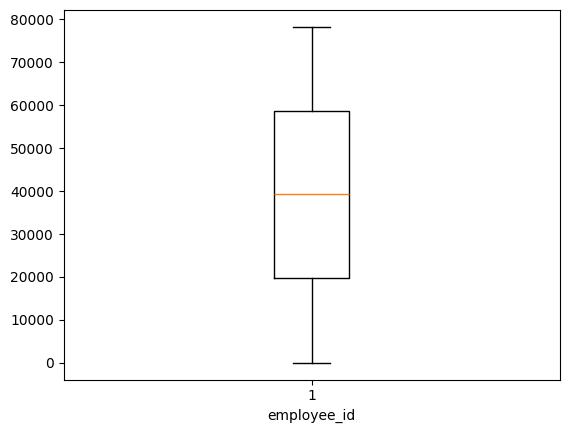

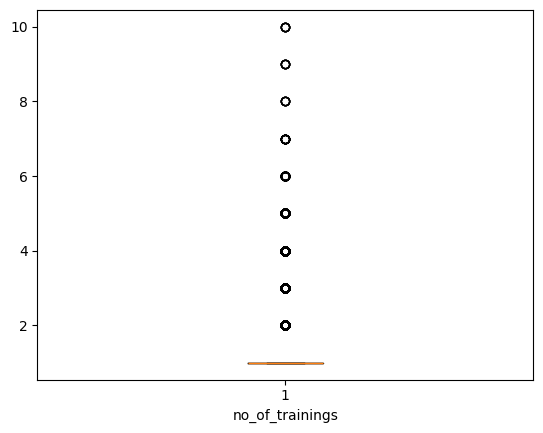

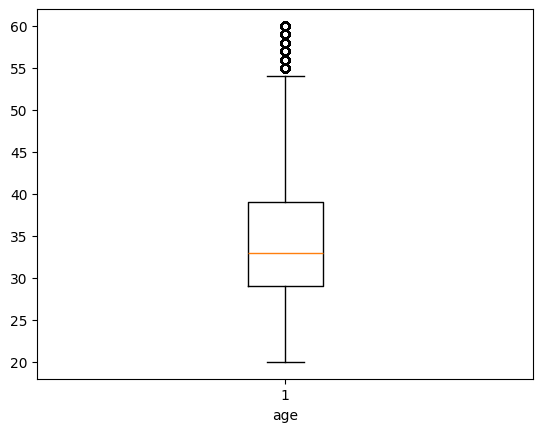

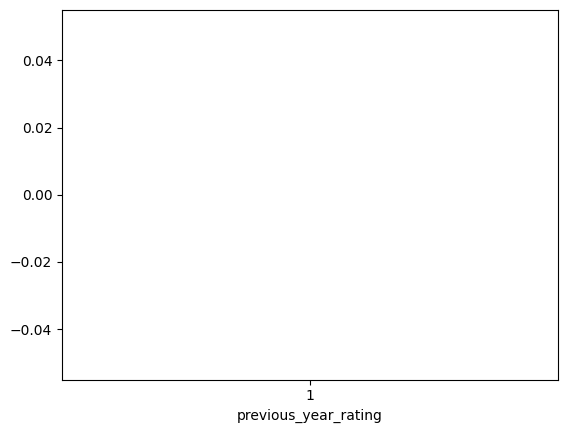

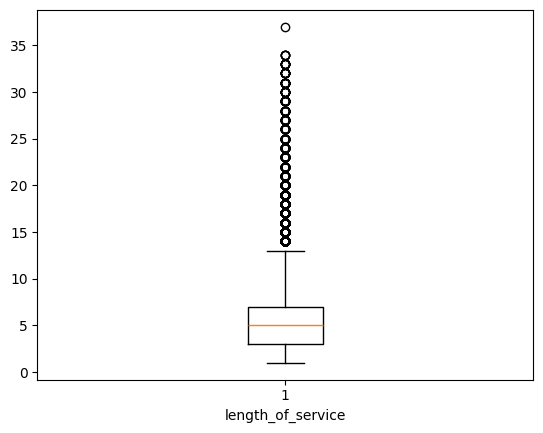

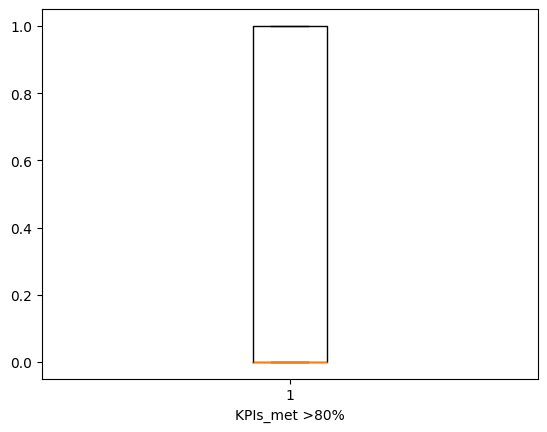

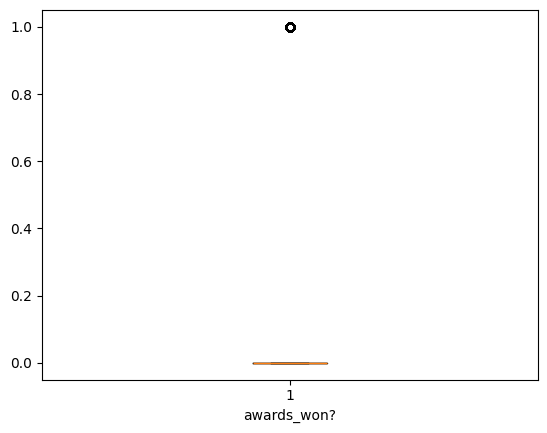

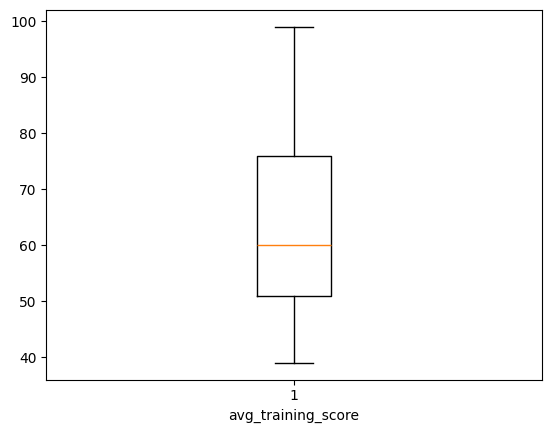

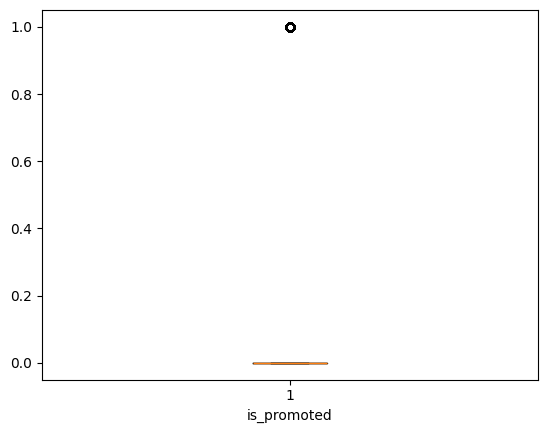

In [93]:
for col in train_data.select_dtypes('number'):
    plt.boxplot(train_data[col])
    plt.xlabel(col)
    plt.show()

In [94]:
for col in train_data.select_dtypes('number'):
    q1 = train_data[col].quantile(0.25)
    q2 = train_data[col].quantile(0.50)
    q3 = train_data[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    print(col,':',lower_limit,upper_limit)


employee_id : -38921.375 117321.625
no_of_trainings : 1.0 1.0
age : 14.0 54.0
previous_year_rating : 1.5 5.5
length_of_service : -3.0 13.0
KPIs_met >80% : -1.5 2.5
awards_won? : 0.0 0.0
avg_training_score : 13.5 113.5
is_promoted : 0.0 0.0


In [95]:
train_data['previous_year_rating'].median()

3.0

In [96]:
train_data['previous_year_rating'] = train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

In [97]:
train_data['previous_year_rating'].isnull().sum()

0

In [98]:
train_data['education'].mode()

,education
0,Bachelor's


In [99]:
train_data['education'] = train_data['education'].fillna(train_data['education'].mode()[0])

In [100]:
train_data['education'].isnull().sum()

0

In [101]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [102]:
test_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [103]:
test_data['previous_year_rating']=test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median())

In [104]:
test_data['education'] = test_data['education'].fillna(test_data['education'].mode()[0])

In [105]:
test_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#Encoding

In [106]:
#one-hot encoding
train_en = OneHotEncoder(sparse_output=False)
for col in ['education', 'gender','recruitment_channel']:
    train_fit = train_en.fit_transform(train_data[[col]])
    data = pd.DataFrame(train_fit, columns= train_en.get_feature_names_out())
    train_data = pd.concat([train_data, data], axis=1)

In [107]:
test_en = OneHotEncoder(sparse_output=False)
for col in ['education', 'gender','recruitment_channel']:
    test_fit = test_en.fit_transform(test_data[[col]])
    data = pd.DataFrame(test_fit, columns= test_en.get_feature_names_out())
    test_data = pd.concat([test_data, data], axis=1)

In [108]:
en = OrdinalEncoder(dtype= np.int64)
train_data['region'] = en.fit_transform(train_data[['region']])
test_data['region'] = en.transform(test_data[['region']])
train_data['department'] = en.fit_transform(train_data[['department']])
test_data['department'] = en.transform(test_data[['department']])


In [109]:
train_data = train_data.drop(['employee_id','gender', 'recruitment_channel', 'education'], axis=1)
test_data = test_data.drop(['employee_id','gender', 'recruitment_channel', 'education'], axis=1)

In [110]:
train_data

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,7,31,1,35,5.0,8,1,0,49,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4,14,1,30,5.0,4,0,0,60,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7,10,1,34,3.0,7,0,0,50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7,15,2,39,1.0,10,0,0,50,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8,18,1,45,3.0,2,0,0,73,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,1,48,3.0,17,0,0,78,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,4,19,1,37,2.0,6,0,0,56,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
54805,0,0,1,27,5.0,3,1,0,79,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,7,33,1,29,1.0,2,0,0,45,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [111]:
test_data

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,8,18,1,24,3.0,1,1,0,77,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,28,1,31,3.0,5,0,0,51,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,7,4,1,31,1.0,4,0,0,47,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,5,11,3,31,2.0,9,0,0,65,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,21,1,30,4.0,7,0,0,61,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,24,3.0,1,0,0,61,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
23486,8,17,1,31,3.0,7,0,0,74,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23487,2,7,1,26,4.0,4,0,0,50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
23488,5,24,3,27,3.0,1,0,0,70,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [112]:
#Feature Target Split
x = train_data.drop('is_promoted', axis=1)
y = train_data['is_promoted']

In [113]:
y.value_counts()

,count
is_promoted,
0,50140
1,4668


In [114]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [115]:
test_x = test_data.values

In [116]:
len(test_x)

23490

In [117]:
sc = StandardScaler()
x_sc = sc.fit_transform(x_train)
y_sc = sc.transform(x)

#Step no:4 Modeling
##Using Decision Tree

In [118]:
dt = DecisionTreeClassifier()


In [119]:
dt.fit(x,y)

DecisionTreeClassifier()

In [120]:
dt_pred = dt.predict(test_x)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [121]:
dt_pred

array([0, 0, 0, ..., 0, 0, 1])

In [122]:
print(cross_val_score(dt,x,y,cv=5))

[0.89965335 0.89490969 0.89335888 0.89982666 0.89316668]


In [123]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.8955809155750012


In [124]:
id = test_data.index.values

In [125]:
sample= np.column_stack([id, dt_pred])

In [126]:
sample = pd.DataFrame(sample[:, :2], columns=['employee_id', 'is_promoted'])

In [127]:
sample.to_csv('sample.csv', index=False)

##Step no:4 Fine Tuning

In [128]:
#Decision Tree
parameters = {
    'criterion': ['gini', 'entropy'],  # Removed 'log_loss' as it's not suitable for Decision Trees
    'max_depth': [None] + list(range(10, 101, 10)),  # More concise depth range
    'min_samples_leaf': range(1, 5),  # Reduced range for faster exploration
    'min_samples_split': range(2, 6),
    'max_features': ['auto', 'sqrt', 'log2'],  # Consider these common options
    'class_weight': ['balanced'],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

tuner = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=parameters,
    n_jobs=-1,  # Use all available cores
    scoring='f1',
    cv=5,
    verbose=2,
    n_iter=500  # Reduced iterations for faster initial exploration
)

In [129]:
tuner.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
830 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
481 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.05, 0.1],
                                        'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 6)},
                   scoring='f1', verbose=2)

In [130]:
tuner_pred = tuner.predict(x_test)

In [131]:
tuner_pred

array([0, 0, 0, ..., 1, 0, 1])

In [132]:
tuner.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 60,
 'criterion': 'entropy',
 'class_weight': 'balanced',
 'ccp_alpha': 0.0}

In [133]:
tuner.best_score_

0.3688744226508066

In [134]:
tuner.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=60, max_features='log2')

In [135]:
tuner.best_index_

368

In [136]:
tuner.error_score

nan

In [137]:
tuner.n_features_in_

17

In [138]:
id = test_data.index.values

In [139]:
sample= np.column_stack([id, dt_pred])

In [140]:
sample = pd.DataFrame(sample[:, :2], columns=['employee_id', 'is_promoted'])

In [141]:
sample.to_csv('sample_tuned.csv', index=False)